# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Get dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

# Data analysis


In [3]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
df_train.isnull().sum()/df_train.shape[0]*100

id                            0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
loan_status                   0.0
dtype: float64

In [6]:
df_train.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
object_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in object_columns:
    unique_values = df_train[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in 'loan_intent': ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
Unique values in 'loan_grade': ['B' 'C' 'A' 'D' 'E' 'F' 'G']
Unique values in 'cb_person_default_on_file': ['N' 'Y']


# EDA

<Axes: xlabel='loan_status'>

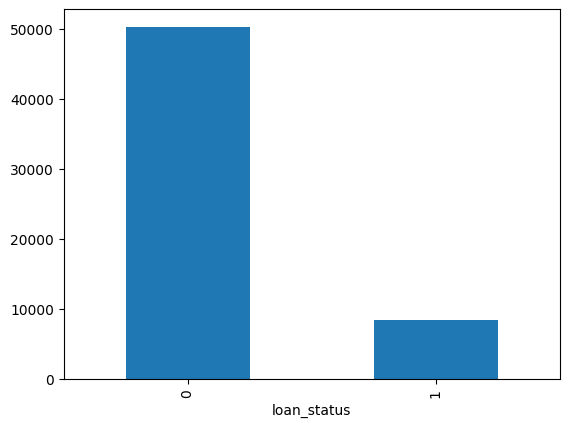

In [9]:
plot = df_train.loan_status.value_counts()
plot.plot(kind='bar')

The probability on accepting lows is low 

<Axes: xlabel='person_age', ylabel='Count'>

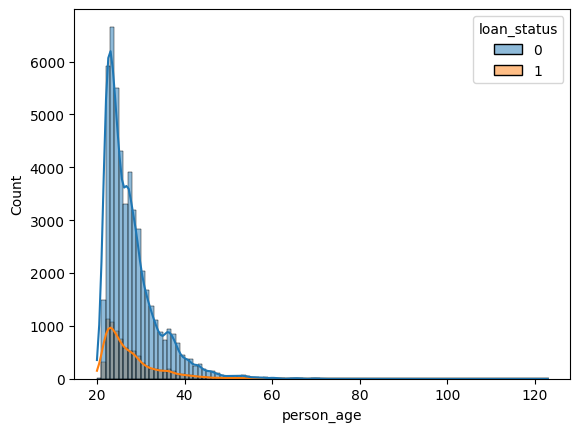

In [10]:
sns.histplot(data=df_train, x='person_age', hue='loan_status', binwidth=1, kde=True)

Probability of accepting loans are around 20-30 age

In [ ]:
sns.histplot(data=df_train, x='person_income', hue='loan_status', binwidth=1, kde=True)

In [ ]:
# do they have a house or not 

In [ ]:
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status')
plt.title('Person with home asking loan')

# Feature eng

# Dataset Preparation

In [ ]:
train, test = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
train = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='loan_status')
test = tfdf.keras.pd_dataframe_to_tf_dataset(test, label='loan_status')

# Model selection

## Random forest (deceision trees)

In [ ]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=['accuracy'])
rf.fit(x=train)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

inspector = rf.make_inspector()
inspector.evaluation()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

In [ ]:
evaluation = tf.evaluate(x=test, return_dict=True)

for name, value in evaluation.items():
    print(name, value)

# Submission

In [ ]:
predict = rf.predict(df_test)
n_predict = ()

In [ ]:
predictions = rf.predict(df_test)

submission_df = pd.DataFrame({
    'id': df_test['id'],
    'prediction': predictions
})

submission_df.to_csv('submission.csv', index=False)